In [1]:
import pandas               as pd
import numpy                as np
import matplotlib.pyplot    as plt
from wordcloud import WordCloud

# 1. Dataset: agents_May2022.csv

This dataset was sent for the SDM

In [2]:
agents_history = pd.read_csv('../0 - datasets/agents_May2022.csv')
agents_history.head()

,id,dev_id,read_time,time_stamp,server_date_time,stat_type,speed,dev_name,altitude,heading,grp_name,geom,localidad,localidad_id,latitude,longitude,serialnumber,devicegroupid
0,1651381596,868033050089715,2022-05-01 00:06:36,2022-05-01 00:01:40,2022-05-01 00:06:36,NaN,0.053087,89008,0,0,S60,0101000020E61000000708E6E8F18652C06ED685C4E234...,RAFAEL URIBE URIBE,18,4.551646,-74.108515,868033050089715,6
1,1651381596,868033050102534,2022-05-01 00:06:36,2022-05-01 00:01:42,2022-05-01 00:06:36,NaN,0.000000,92451,0,0,S60,0101000020E6100000393F6AB86D8952C048B02770A199...,KENNEDY,8,4.650030,-74.147322,868033050102534,6
2,1651381596,868033050103334,2022-05-01 00:06:36,2022-05-01 00:02:59,2022-05-01 00:06:36,NaN,1.635883,92229,0,0,S60,0101000020E6100000F3959B03DF8852C02C78769E1D3D...,CIUDAD BOLIVAR,19,4.559683,-74.138612,868033050103334,6
3,1651381596,868033050099326,2022-05-01 00:06:36,2022-05-01 00:04:31,2022-05-01 00:06:36,NaN,0.000000,41325,0,0,S60,0101000020E6100000C5C6BC8E388852C070044E5BC858...,RAFAEL URIBE URIBE,18,4.586702,-74.128452,868033050099326,6
4,1651381596,868033050102682,2022-05-01 00:06:36,2022-05-01 00:05:06,2022-05-01 00:06:36,NaN,0.000000,94387,0,0,S60,0101000020E61000001A8C6C42B58C52C0683B4B35585D...,Engativa,10,4.591157,-74.198563,868033050102682,6


## Dataset Description 

The following result shows how many records has the dataset, and which fields has missing values

In [3]:
agents_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97608 entries, 0 to 97607
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                97608 non-null  int64  
 1   dev_id            97608 non-null  int64  
 2   read_time         97608 non-null  object 
 3   time_stamp        97608 non-null  object 
 4   server_date_time  97608 non-null  object 
 5   stat_type         0 non-null      float64
 6   speed             97608 non-null  float64
 7   dev_name          97608 non-null  object 
 8   altitude          97608 non-null  int64  
 9   heading           97608 non-null  int64  
 10  grp_name          97608 non-null  object 
 11  geom              97608 non-null  object 
 12  localidad         97608 non-null  object 
 13  localidad_id      97608 non-null  int64  
 14  latitude          97608 non-null  float64
 15  longitude         97608 non-null  float64
 16  serialnumber      97608 non-null  int64 

In [4]:
dates = ['read_time','time_stamp','server_date_time']
for date in dates:
    agents_history[date] = pd.to_datetime(agents_history[date])

In [5]:
agents_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97608 entries, 0 to 97607
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                97608 non-null  int64         
 1   dev_id            97608 non-null  int64         
 2   read_time         97608 non-null  datetime64[ns]
 3   time_stamp        97608 non-null  datetime64[ns]
 4   server_date_time  97608 non-null  datetime64[ns]
 5   stat_type         0 non-null      float64       
 6   speed             97608 non-null  float64       
 7   dev_name          97608 non-null  object        
 8   altitude          97608 non-null  int64         
 9   heading           97608 non-null  int64         
 10  grp_name          97608 non-null  object        
 11  geom              97608 non-null  object        
 12  localidad         97608 non-null  object        
 13  localidad_id      97608 non-null  int64         
 14  latitude          9760

## Exploratory Data Analysis

This dataset stores historical information from the Transit Agents (Geo position and information). It's possible to determine what places the agent has visited in the month.

In [6]:
# The total number of agents in the dataset
agents_history.id.unique().size

3583

In [7]:
# The first 10 values of agents
agents_history.id.unique()[:10]

array([1651381596, 1651382197, 1651382799, 1651383400, 1651384001,
       1651384602, 1651385204, 1651385805, 1651386405, 1651387006])

In [25]:
agents_history.localidad.unique().tolist()

['RAFAEL URIBE URIBE',
 'KENNEDY',
 'CIUDAD BOLIVAR',
 'Engativa',
 'PUENTE ARANDA',
 'USME',
 'LOS MARTIRES',
 'BOSA',
 'TUNJUELITO',
 'USAQUEN',
 'SAN CRISTOBAL',
 'CHAPINERO',
 'FONTIBON',
 'ENGATIVA',
 'SUBA',
 'CANDELARIA',
 'TEUSAQUILLO',
 'SANTA FE',
 'ANTONIO NARIÃ‘O',
 'BARRIOS UNIDOS',
 'ANTONIO NARIﾃ前',
 'ANTONIO NARIÑO']

In [27]:
# Places that one agent has visited
agents_history[agents_history.id == 1651381596][['time_stamp', 'localidad']]\
.sort_values(by='time_stamp').reset_index(drop=True).head(20)

,time_stamp,localidad
0,2022-05-01 00:01:40,RAFAEL URIBE URIBE
1,2022-05-01 00:01:42,KENNEDY
2,2022-05-01 00:01:47,RAFAEL URIBE URIBE
3,2022-05-01 00:01:52,CIUDAD BOLIVAR
4,2022-05-01 00:01:55,KENNEDY
5,2022-05-01 00:01:56,KENNEDY
6,2022-05-01 00:02:08,PUENTE ARANDA
7,2022-05-01 00:02:09,TUNJUELITO
8,2022-05-01 00:02:42,BOSA
9,2022-05-01 00:02:58,KENNEDY


In [9]:
# Agents with most records in the history dataset
agents_history.groupby(by=['id']).size().sort_values(ascending=False).head(10)

id
1651700515    152
1653499909    146
1652996918    137
1653431887    133
1653505377    132
1653073934    126
1652982478    124
1653490292    124
1652302015    122
1653508384    120
dtype: int64

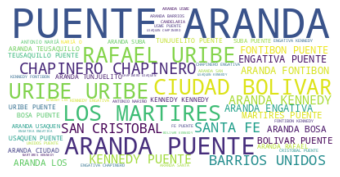

In [22]:
#agents_history[agents_history['localidad']==agents_history['localidad'].value_counts().index[0]]
text = ' '.join(agents_history['localidad'])
wordcloud = WordCloud(max_font_size=100, max_words=100000, background_color='white').generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

array([[<AxesSubplot:title={'center':'id'}>]], dtype=object)

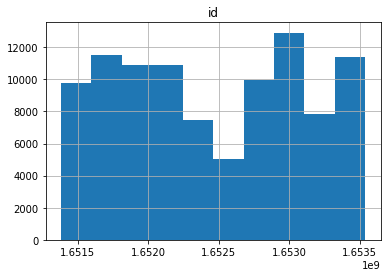

In [60]:
agents_history.plot.bar()

In [55]:
# The beginning and end of this dataset
print(f'The oldest record has the timestamp: {min(agents_history.time_stamp)}\nThe newest record has the timestamp: {max(agents_history.time_stamp)}')

The oldest record has the timestamp: 2022-05-01 00:01:40
The newest record has the timestamp: 2022-05-25 23:54:39
